# Breast Cancer

 Binary Classication for 

 - Logistic Regression: Use method from skicklearn directly
 - Step2: Implement epochs and report best mse / accuracy and r2 
 - Step3: 
 - **Loss Function**

## Logistic Regression 

### Data Prep

In [45]:
# Referemce to HW_1 Code  
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split,KFold
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
 

def logisticRegression(X, y, epochs, folds,random_state=None):
    models = []
    accuracy_scores = []
    
    kf = KFold(n_splits=folds, shuffle=True, random_state=random_state)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        model = SGDClassifier(loss="log_loss", max_iter=epochs)
        # model = LogisticRegression()
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        
        # Use method directly 
        model = LogisticRegression()
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        
        accuracy = accuracy_score(y_test, y_pred)
        print(f"The accuracy is: {accuracy}")
        
        accuracy_scores.append(accuracy) 
        models.append(model) 

    max_accuracy_index = np.argmax(accuracy_scores)
    best_model = models[max_accuracy_index]
    average_accuracy = np.mean(accuracy_scores)

    print(f"Best model's weights are: {best_model.coef_} because it has the best accuracy of {max(accuracy_scores)} \n")
    print(f"Accuracy Score Mean: {average_accuracy}")
    
    return average_accuracy, model


breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target
print("dataset size:{}".format(X.shape[0]))

average_acc, best_model = logisticRegression(X, y, epochs=100, folds=20,random_state=42); 



dataset size:569
The accuracy is: 0.9655172413793104
The accuracy is: 1.0
The accuracy is: 0.9655172413793104
The accuracy is: 0.9310344827586207
The accuracy is: 1.0
The accuracy is: 1.0
The accuracy is: 0.9655172413793104
The accuracy is: 1.0
The accuracy is: 0.9655172413793104
The accuracy is: 1.0
The accuracy is: 0.8571428571428571
The accuracy is: 1.0
The accuracy is: 1.0
The accuracy is: 1.0
The accuracy is: 1.0
The accuracy is: 0.9642857142857143
The accuracy is: 0.9285714285714286
The accuracy is: 0.9285714285714286
The accuracy is: 1.0
The accuracy is: 0.9642857142857143
Best model's weights are: [[-0.36546851 -0.4179378  -0.35954261 -0.44254779 -0.16161523  0.57079884
  -0.86362131 -0.99932266  0.08915844  0.25710655 -1.28684127  0.2755201
  -0.6599993  -1.00271767 -0.30024631  0.7400309   0.11986507 -0.30429524
   0.2980369   0.70359202 -0.99560489 -1.27679861 -0.80318041 -0.97927233
  -0.64350094  0.01612441 -0.85356889 -0.8490369  -0.92568465 -0.47038657]] because it has t

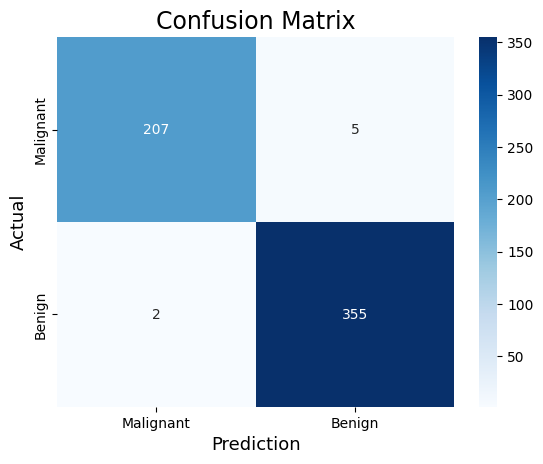

In [44]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_pred = best_model.predict(X_scaled)

final_accuracy = accuracy_score(y, y_pred)
print(f"Final Accuracy on the entire dataset: {final_accuracy}")
cm = confusion_matrix(y, y_pred)

sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Malignant', 'Benign'],
            yticklabels=['Malignant', 'Benign'],
            cmap='Blues')
plt.xlabel('Prediction', fontsize=13)
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()